# ***TP1: Logique floue***

In [166]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Exercice 1:

In [167]:
Distance_to_next_car = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
Distance_to_next_car

Antecedent: Distance_to_next_car

In [168]:
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 1, 2])
Distance_to_next_car['small'] = fuzz.trimf(Distance_to_next_car.universe, [1, 2, 3])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [3, 5, 9])
Distance_to_next_car['big'] = fuzz.trimf(Distance_to_next_car.universe, [8, 14, 20])
Distance_to_next_car['v_big'] = fuzz.trapmf(Distance_to_next_car.universe, [15, 20 , 30, 30])

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


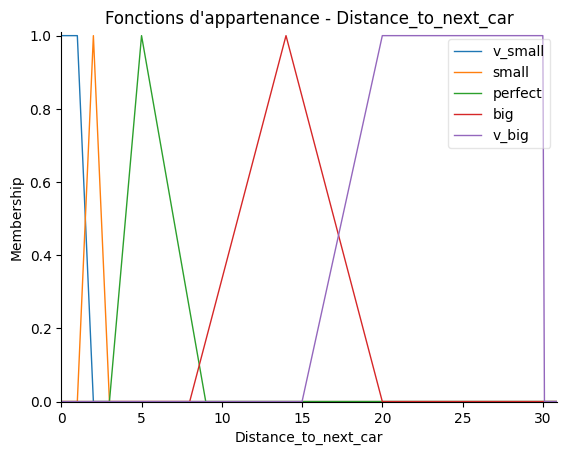

In [169]:
Distance_to_next_car.view()
plt.title('Fonctions d\'appartenance - Distance_to_next_car')
plt.show()

# Exercice 2:

In [170]:
Speed_change = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')
Speed_change

Antecedent: Speed_change

In [171]:
Speed_change['declining'] = fuzz.trimf(Speed_change.universe, [-20, -20, 0])
Speed_change['constant'] = fuzz.trapmf(Speed_change.universe, [-10, -3, 3, 10])
Speed_change['growing'] = fuzz.trimf(Speed_change.universe, [0, 20, 20])

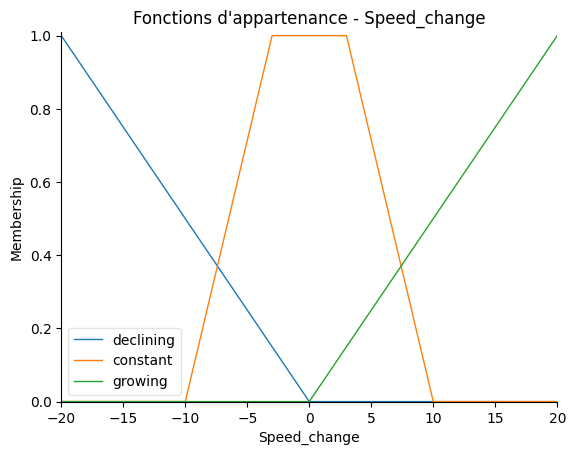

In [172]:
Speed_change.view()
plt.title('Fonctions d\'appartenance - Speed_change')
plt.show()

# Exercice 3:

In [173]:
Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 4, 0.1), 'Acceleration_Adjust')
Acceleration_Adjust

Consequent: Acceleration_Adjust

**Remarque :**  
 Le pas de l’univers a été réduit de `1` à `0.1` afin d’obtenir des courbes plus lisses et de mieux représenter les valeurs décimales (par exemple `2.5`).  


In [174]:
Acceleration_Adjust['neg_big'] = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2.5, -2])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero'] = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big'] = fuzz.trapmf(Acceleration_Adjust.universe, [2, 2.5, 3, 3])


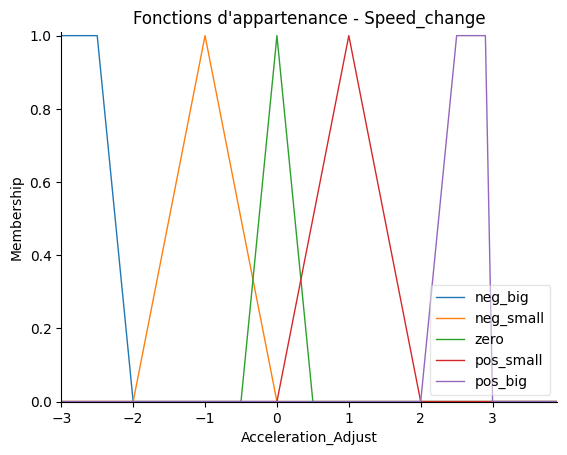

In [175]:
Acceleration_Adjust.view()
plt.title('Fonctions d\'appartenance - Speed_change')
plt.show()

# Exercice 4:

In [176]:
reg1 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small'])
reg2 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'], Acceleration_Adjust['neg_big'])
reg3 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])

reg4 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'], Acceleration_Adjust['zero'])
reg5 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'], Acceleration_Adjust['neg_small'])
reg6 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])

reg7 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small'])
reg8 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'], Acceleration_Adjust['zero'])
reg9 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'], Acceleration_Adjust['neg_small'])

reg10 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
reg11 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'], Acceleration_Adjust['pos_small'])
reg12 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'], Acceleration_Adjust['zero'])

reg13 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
reg14 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'], Acceleration_Adjust['pos_big'])
reg15 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'], Acceleration_Adjust['pos_small'])

1.166542189734627


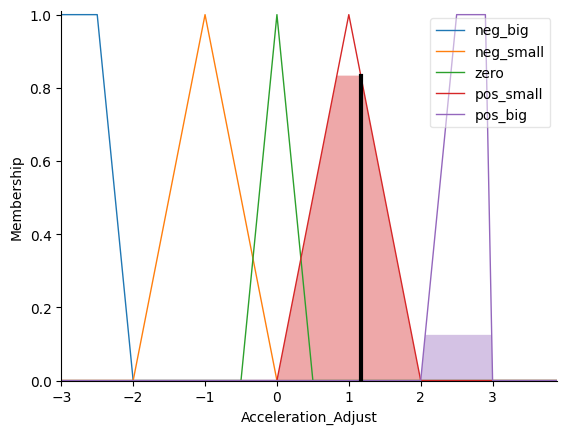

In [177]:
Acceleration_Adjust_ctrl = ctrl.ControlSystem([reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10, reg11, reg12, reg13, reg14, reg15])
Acceleration_Adjust_simulation = ctrl.ControlSystemSimulation(Acceleration_Adjust_ctrl)
Acceleration_Adjust.defuzzify_method = 'centroid'
Acceleration_Adjust_simulation.input['Distance_to_next_car'] = 13
Acceleration_Adjust_simulation.input['Speed_change'] = -2.5
Acceleration_Adjust_simulation.compute()
print(Acceleration_Adjust_simulation.output['Acceleration_Adjust'])
Acceleration_Adjust.view(sim=Acceleration_Adjust_simulation)

# ***TP2: Logique floue et intégration du ML***

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

In [179]:
np.random.seed(42)

distances = np.random.uniform(0, 30, 1000)
speeds = np.random.uniform(-20, 20, 1000)

In [180]:
fuzzy_sim = ctrl.ControlSystemSimulation(Acceleration_Adjust_ctrl)

In [181]:
outputs = []

for d, s in zip(distances, speeds):
    fuzzy_sim.input['Distance_to_next_car'] = d
    fuzzy_sim.input['Speed_change'] = s
    fuzzy_sim.compute()
    outputs.append(fuzzy_sim.output['Acceleration_Adjust'])

data = pd.DataFrame({
    'Distance_to_next_car': distances,
    'Speed_change': speeds,
    'Acceleration_Adjust': outputs
})

display(data.head())


X = data[['Distance_to_next_car', 'Speed_change']]
y = data['Acceleration_Adjust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

,Distance_to_next_car,Speed_change,Acceleration_Adjust
0,11.236204,-12.594683,2.550466
1,28.521429,1.676038,2.289826
2,21.959818,14.917833,1.000000
3,17.959755,9.288995,0.927239
4,4.680559,12.262446,-1.000000


In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur absolue moyenne (MAE) : ",mae)
print("Erreur quadratique moyenne (MSE) : ", mse)
print("Coefficient de détermination (R²) : ", r2)


Erreur absolue moyenne (MAE) :  0.49945852260823864
Erreur quadratique moyenne (MSE) :  0.4178026878724795
Coefficient de détermination (R²) :  0.7939128076283561


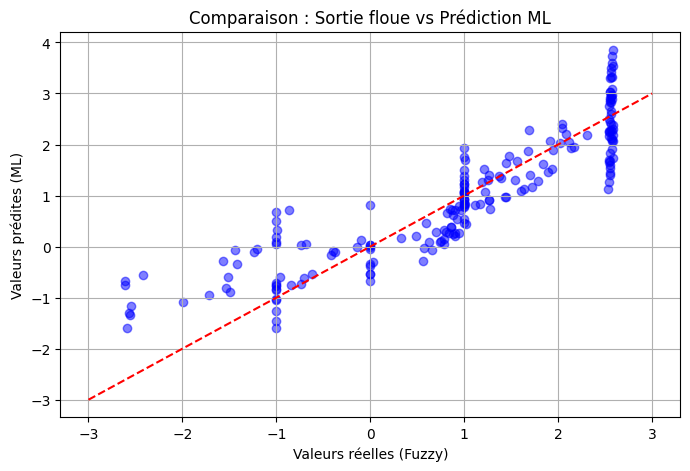

In [183]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-3,3], [-3,3], 'r--')
plt.xlabel("Valeurs réelles (Fuzzy)")
plt.ylabel("Valeurs prédites (ML)")
plt.title("Comparaison : Sortie floue vs Prédiction ML")
plt.grid(True)
plt.show()


Erreur absolue moyenne (MAE) 0.0329976375637428
Erreur quadratique moyenne (MSE) 0.00798065354132415
Coefficient de détermination (R²) 0.9960634277151317


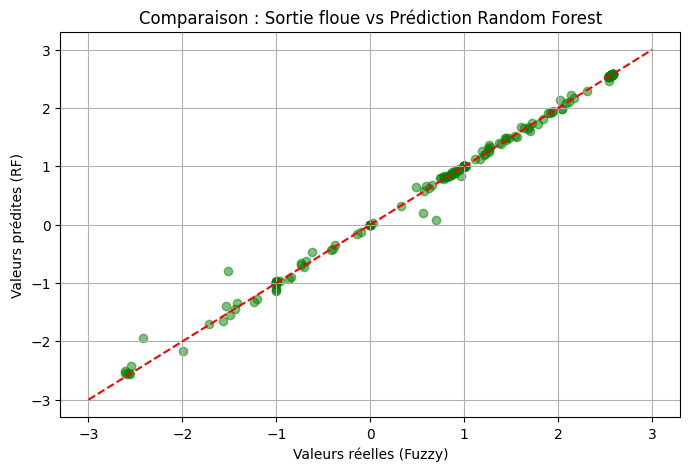

Prédiction Random Forest pour (13, -2.5) 1.2201286614643825


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [184]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Erreur absolue moyenne (MAE)", mae_rf)
print("Erreur quadratique moyenne (MSE)", mse_rf)
print("Coefficient de détermination (R²)", r2_rf)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([-3,3], [-3,3], 'r--')
plt.xlabel("Valeurs réelles (Fuzzy)")
plt.ylabel("Valeurs prédites (RF)")
plt.title("Comparaison : Sortie floue vs Prédiction Random Forest")
plt.grid(True)
plt.show()

y_pred_rf_new = rf_model.predict(np.array([[13, -2.5]]))
print(f"Prédiction Random Forest pour (13, -2.5)", y_pred_rf_new[0])

# Comparaison : Logique Floue vs Machine Learning

## Avantages de la Logique Floue
- **Compréhension facile** : Les règles sont comme du langage humain
- **Transparent** : On voit exactement pourquoi une décision est prise

## Avantages du Machine Learning  
- **Plus précis** : Donne généralement de meilleurs résultats numériques
- **Apprend tout seul** : Découvre des patterns complexes sans aide humaine